### This script includes the following points:

#### 1. Import the data
#### 2. Memory optimization
#### 3. Part1 Q2 : Data security conserns
#### 4. Part1 Q3 : make new column = region
#### 5. Part1 Q4 : Creating exclusion flag
#### 6. Part1 Q5 : Making Customer profile
#### 7. Part1 Q5 : Making Income profile
#### 8. Part1 Q7 : Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### 9. Part1 Q8 : Compare your customer profiles with regions and departments

#### 1. Import the data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Poory\OneDrive\Desktop\project\Instacart Basket Analysis"

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final2.pkl'))

In [4]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int32  
 1   user_id                int32  
 2   order_number           int8   
 3   orders_day_of_week     int8   
 4   order_hour_of_day      int8   
 5   last_order_days        float16
 6   first_order            bool   
 7   product_id             int32  
 8   add_to_cart_order      int32  
 9   reordered              int8   
 10  product_name           object 
 11  aisle_id               int32  
 12  department_id          int32  
 13  prices                 float32
 14  price_range            object 
 15  busiest_day            object 
 16  busiest_days           object 
 17  busiest_period_of_day  object 
 18  max_order              int8   
 19  loyalty_flag           object 
 20  avg_spent              float32
 21  spending_flag          object 
 22  order_freq_med  

In [7]:
# Change some columne data type to optimize memory
df['orders_day'] = df['orders_day'].astype('category')
df['department'] = df['department'].astype('category')
df['price_range'] = df['price_range'].astype('category')
df['busiest_day'] = df['busiest_day'].astype('category')
df['busiest_days'] = df['busiest_days'].astype('category')
df['loyalty_flag'] = df['loyalty_flag'].astype('category')
df['spending_flag'] = df['spending_flag'].astype('category')
df['frequency_flag'] = df['frequency_flag'].astype('category')
df['gender'] = df['gender'].astype('category')
df['state'] = df['state'].astype('category')
df['fam_status'] = df['fam_status'].astype('category')
df['busiest_period_of_day'] = df['busiest_period_of_day'].astype('category')

### Part1 Q2 : Data security conserns

#### I've already deleted a few columns due to personally identifiable infomation like first_nam and last_name columns. In my final DF I couldn't find any Data security issues in respect of PII.

### Part1 Q3 : make new column = region

In [8]:
# Creating list of each state region 
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# creating new flag of region based on states
df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'
df['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [10]:
# Finding difference in spending habits between the different U.S. regions
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)
crosstab.to_clipboard()

### Based on the excel spreadsheet most of our customers are in the South and least of them are in the Northeast

###### region------High spender---Low spender
###### South------- 40739----------10751146
###### West-------- 31286----------8261627
###### Midwest----- 29294----------7568031
###### Northeast--- 18642----------5704094

### In addition we can see a great diffrences between number of the high spenders and low spenders customers in all regions.

### Part1 Q4 :
### Creating exclusion flag

In [11]:
# Creat activity flaf based on max_order column:
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity customers'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high-activity customers'

In [12]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers


In [13]:
df['activity_flag'].value_counts(dropna=False)

activity_flag
high-activity customers    30964564
low-activity customers      1440295
Name: count, dtype: int64

In [14]:
# Making two DFs based on activity_flag
df_norm = df.loc[df['activity_flag'] == 'high-activity customers']
df_low = df.loc[df['activity_flag'] == 'low-activity customers']

In [15]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404857
Data columns (total 35 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                int32   
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   last_order_days        float16 
 6   first_order            bool    
 7   product_id             int32   
 8   add_to_cart_order      int32   
 9   reordered              int8    
 10  product_name           object  
 11  aisle_id               int32   
 12  department_id          int32   
 13  prices                 float32 
 14  price_range            category
 15  busiest_day            category
 16  busiest_days           category
 17  busiest_period_of_day  category
 18  max_order              int8    
 19  loyalty_flag           category
 20  avg_spent              float32 
 21  spending_flag          category
 2

In [16]:
df_norm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers


In [17]:
# Exporting these two Data Frames:
df_norm.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_norm_activity.pkl'))
df_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_low_activity.pkl'))

### Part1 Q5 : Making Customer profile

In [18]:
# Import new Data frame with out low activity customers:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_norm_activity.pkl'))

In [19]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers


In [20]:
### creat age group column :
df.loc[df['age'] < 40 , 'age_group'] = 'Young Adults'
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age_group'] = 'Middle-aged Adults'
df.loc[df['age'] >= 60 , 'age_group'] = 'Old Adults'

In [21]:
df['age_group'].value_counts(dropna=False)

age_group
Young Adults          10665110
Old Adults            10574504
Middle-aged Adults     9724950
Name: count, dtype: int64

In [22]:
df['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [26]:
### creat department profile :

Fresh_Food = ["dairy eggs", "deli", "meat seafood", "produce", "frozen"]
Non_Perishable_Food = ["snacks", "beverages", "pantry", "canned goods", "dry goods pasta", "breakfast", "bakery"]
Household_Personal_Care = ["household", "personal care"]
Miscellaneous = ["babies", "international", "missing", "other", "bulk"]


df.loc[df['department'].isin(Fresh_Food) == True, 'dep_group'] = 'Fresh Food'
df.loc[df['department'].isin(Non_Perishable_Food) == True, 'dep_group'] = 'Non-Perishable_Food'
df.loc[df['department'].isin(Household_Personal_Care) == True, 'dep_group'] = 'Household & Personal_Care'
df.loc[df['department'].isin(Miscellaneous) == True, 'dep_group'] = 'Miscellaneous'
df.loc[df['department'] == "pets", 'dep_group'] = 'Pet Owner'
df.loc[df['department'] == "alcohol", 'dep_group'] = 'Alcohol consumer'

df['dep_group'].value_counts(dropna=False)

dep_group
Fresh Food                   18056801
Non-Perishable_Food          10746900
Household & Personal_Care     1124163
Miscellaneous                  799013
Alcohol consumer               144627
Pet Owner                       93060
Name: count, dtype: int64

In [27]:
df['fam_status'].value_counts(dropna=False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

### Customer Profile

In [28]:
df.loc[(df['age_group'] == 'Young Adults') & (df['fam_status'] == 'married') & (df['n_dependants'] < 2), 'customer_prf'] = 'Married Young Adults W/O Child'
df.loc[(df['age_group'] == 'Young Adults') & (df['fam_status'] == 'married') & (df['n_dependants'] > 1), 'customer_prf'] = 'Married Young Adults With Child'
df.loc[(df['age_group'] == 'Young Adults') & (df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'customer_prf'] = 'Single Young Adults W/O Child'
df.loc[(df['age_group'] == 'Young Adults') & (df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'customer_prf'] = 'Single Young Adults With Child'
df.loc[(df['age_group'] == 'Middle-aged Adults') & (df['fam_status'] == 'married') & (df['n_dependants'] < 2), 'customer_prf'] = 'Married Middle-aged W/O Child'
df.loc[(df['age_group'] == 'Middle-aged Adults') & (df['fam_status'] == 'married') & (df['n_dependants'] > 1), 'customer_prf'] = 'Married Middle-aged With Child'
df.loc[(df['age_group'] == 'Middle-aged Adults') & (df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'customer_prf'] = 'Single Middle-aged With Child'
df.loc[(df['age_group'] == 'Middle-aged Adults') & (df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'customer_prf'] = 'Single Middle-aged W/O Child'
df.loc[(df['age_group'] == 'Old Adults') & (df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'customer_prf'] = 'Single Old Adults With Child'
df.loc[(df['age_group'] == 'Old Adults') & (df['fam_status'] == 'married') & (df['n_dependants'] < 2), 'customer_prf'] = 'Married Old Adults W/O Child'
df.loc[(df['age_group'] == 'Old Adults') & (df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'customer_prf'] = 'Single Old Adults W/O Child'
df.loc[(df['age_group'] == 'Old Adults') & (df['fam_status'] == 'married') & (df['n_dependants'] > 1), 'customer_prf'] = 'Married Old Adults With Child'

In [29]:
df['customer_prf'].value_counts(dropna=False)

customer_prf
Married Old Adults With Child      5346080
Married Middle-aged With Child     4814707
Married Young Adults With Child    4371863
Single Young Adults W/O Child      2660575
Single Old Adults W/O Child        2645271
Married Old Adults W/O Child       2583153
Married Middle-aged W/O Child      2476408
Single Middle-aged W/O Child       2433835
Married Young Adults W/O Child     2151500
Single Young Adults With Child     1481172
Name: count, dtype: int64

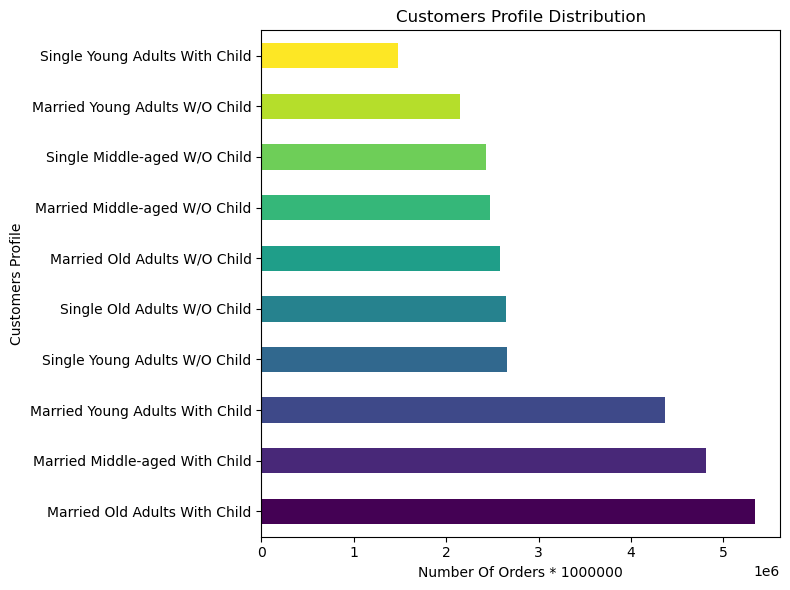

In [30]:
plt.figure(figsize=(8,6))
colors = plt.cm.viridis(np.linspace(0, 1, 10))
bar_cus = df['customer_prf'].value_counts(dropna=False).plot.barh(color=colors)
plt.title('Customers Profile Distribution')
plt.xlabel('Number Of Orders * 1000000')
plt.ylabel('Customers Profile')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_cust_prf.png'))
plt.show()

### Income profile

In [31]:
### creat income group column :
df.loc[df['income'] < 50000 , 'inc_group'] = 'Low Income'
df.loc[(df['income'] >= 50000) & (df['income'] < 100000), 'inc_group'] = 'Middle Income'
df.loc[df['income'] >= 100000, 'inc_group'] = 'High Income'

In [32]:
df.loc[(df['inc_group'] == 'Low Income') & (df['fam_status'] == 'married') & (df['n_dependants'] < 2), 'income_prf'] = 'Married Low Income W/O Child'
df.loc[(df['inc_group'] == 'Low Income') & (df['fam_status'] == 'married') & (df['n_dependants'] > 1), 'income_prf'] = 'Married Low Income With Child'
df.loc[(df['inc_group'] == 'Low Income') & (df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'income_prf'] = 'Single Low Income W/O Child'
df.loc[(df['inc_group'] == 'Low Income') & (df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'income_prf'] = 'Single Low Income With Child'
df.loc[(df['inc_group'] == 'Middle Income') & (df['fam_status'] == 'married') & (df['n_dependants'] < 2), 'income_prf'] = 'Married Middle Income W/O Child'
df.loc[(df['inc_group'] == 'Middle Income') & (df['fam_status'] == 'married') & (df['n_dependants'] > 1), 'income_prf'] = 'Married Middle Income With Child'
df.loc[(df['inc_group'] == 'Middle Income') & (df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'income_prf'] = 'Single Middle Income With Child'
df.loc[(df['inc_group'] == 'Middle Income') & (df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'income_prf'] = 'Single Middle Income W/O Child'
df.loc[(df['inc_group'] == 'High Income') & (df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'income_prf'] = 'Single High Income With Child'
df.loc[(df['inc_group'] == 'High Income') & (df['fam_status'] == 'married') & (df['n_dependants'] < 2), 'income_prf'] = 'Married High Income W/O Child'
df.loc[(df['inc_group'] == 'High Income') & (df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'income_prf'] = 'Single High Income W/O Child'
df.loc[(df['inc_group'] == 'High Income') & (df['fam_status'] == 'married') & (df['n_dependants'] > 1), 'income_prf'] = 'Married High Income With Child'

In [33]:
df['income_prf'].value_counts(dropna=False)

income_prf
Married High Income With Child      7084216
Married Middle Income With Child    5909406
Single High Income W/O Child        3568956
Married High Income W/O Child       3506682
Single Middle Income W/O Child      3323805
Married Middle Income W/O Child     2948315
Married Low Income With Child       1539028
Single Middle Income With Child     1213082
Single Low Income W/O Child          846920
Married Low Income W/O Child         756064
Single Low Income With Child         220542
Single High Income With Child         47548
Name: count, dtype: int64

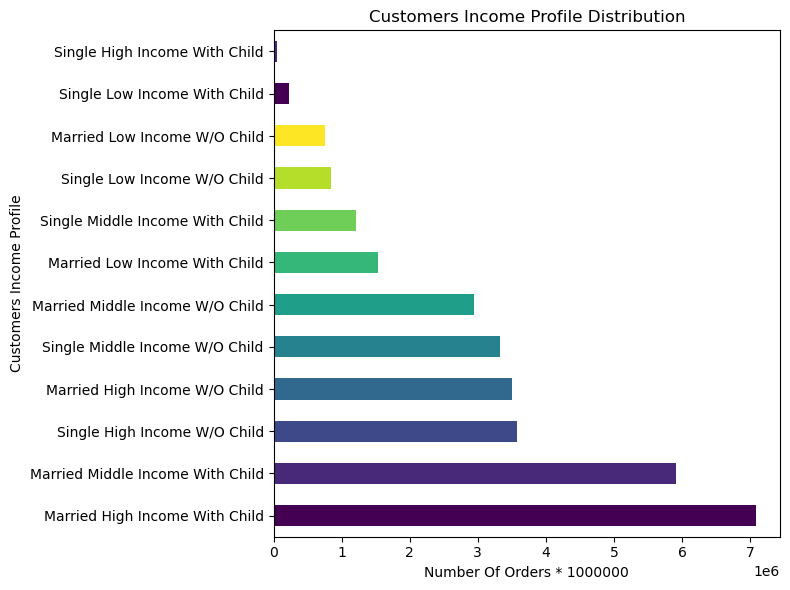

In [34]:
plt.figure(figsize=(8,6))
colors = plt.cm.viridis(np.linspace(0, 1, 10))
df['income_prf'].value_counts(dropna=False).plot.barh(color=colors)
plt.title('Customers Income Profile Distribution')
plt.xlabel('Number Of Orders * 1000000')
plt.ylabel('Customers Income Profile')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_inc_prf.png'))
plt.show()

In [35]:
# Exporting df
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final3.pkl'))

In [36]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag,age_group,dep_group,customer_prf,inc_group,income_prf
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child


### Q7 : Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [37]:
df_q7 = df.groupby('customer_prf').agg({'avg_spent':['min','mean','max'],'order_freq_med':['min','mean','max']})


In [38]:
df_q7

avg_spent                      order_freq_med  \
                                      min      mean        max            min   
customer_prf                                                                    
Married Middle-aged W/O Child    1.500000  7.784690  18.233334            0.0   
Married Middle-aged With Child   1.522222  7.798398  20.114286            0.0   
Married Old Adults W/O Child     1.300000  7.807477  19.400000            0.0   
Married Old Adults With Child    1.262500  7.788335  17.700001            0.0   
Married Young Adults W/O Child   1.773333  7.797172  15.000000            0.0   
Married Young Adults With Child  1.000000  7.778532  14.423077            0.0   
Single Middle-aged W/O Child     1.000000  7.789475  16.294737            0.0   
Single Old Adults W/O Child      1.308333  7.802122  16.931250            0.0   
Single Young Adults W/O Child    1.800000  7.779907  14.761905            0.0   
Single Young Adults With Child   2.133333  7.801463  14.900000            0.0   

                                                  
                                      mean   max  
customer_prf                                      
Married Middle-aged W/O Child     9.982145  30.0  
Married Middle-aged With Child   10.012563  30.0  
Married Old Adults W/O Child     10.031092  30.0  
Married Old Adults With Child     9.950011  30.0  
Married Young Adults W/O Child    9.920097  30.0  
Married Young Adults With Child   9.931140  30.0  
Single Middle-aged W/O Child      9.884994  30.0  
Single Old Adults W/O Child       9.874549  30.0  
Single Young Adults W/O Child    10.045411  30.0  
Single Young Adults With Child    9.869970  30.0

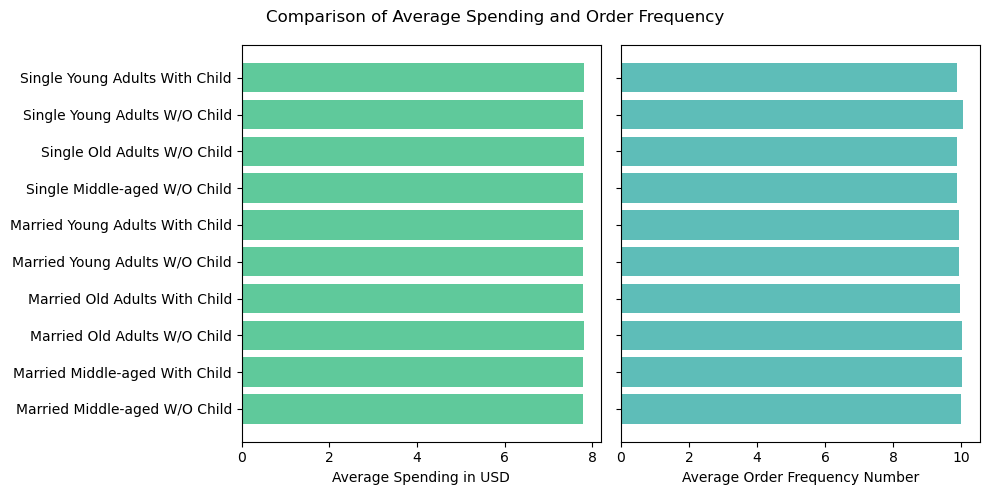

In [39]:
# Group by 'customer_prf' and calculate the mean of 'avg_spent' and 'order_freq_med'
df_q7a = df.groupby('customer_prf').agg({'avg_spent':'mean', 'order_freq_med':'mean'})

# Get customer profiles as a list
customer_profiles = df_q7a.index.tolist()

# Create a figure and axes with shared y-axis
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# Plot average spending for each customer profile
ax1.barh(customer_profiles, df_q7a['avg_spent'], color='#1bb371', alpha=0.7)
ax1.set_xlabel('Average Spending in USD')


# Plot order frequency for each customer profile
ax2.barh(customer_profiles, df_q7a['order_freq_med'], color='#1aa19a', alpha=0.7)
ax2.set_xlabel('Average Order Frequency Number')


# Add suptitle
fig.suptitle('Comparison of Average Spending and Order Frequency')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_cust_spending_prf.png'))
plt.show()


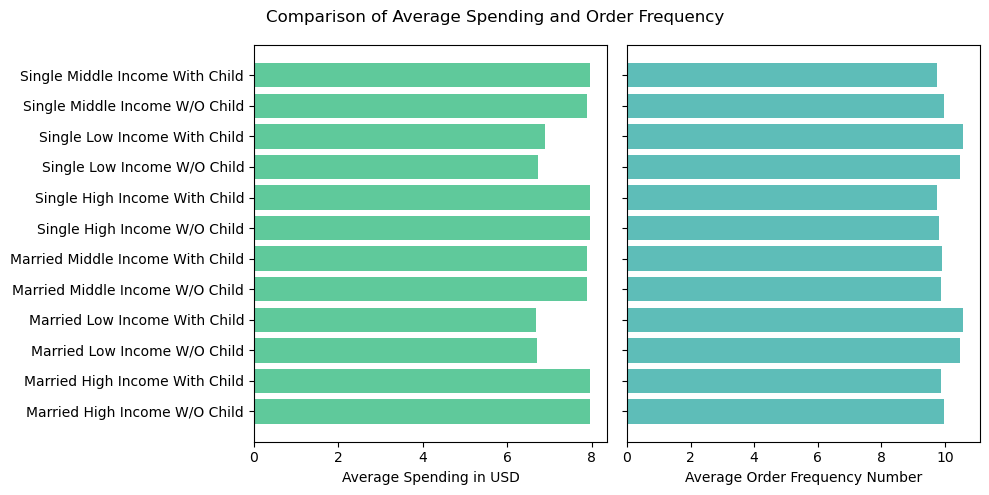

In [40]:
# Group by 'customer_prf' and calculate the mean of 'avg_spent' and 'order_freq_med'
df_q7b = df.groupby('income_prf').agg({'avg_spent':'mean', 'order_freq_med':'mean'})

# Get customer profiles as a list
customer_profiles = df_q7b.index.tolist()

# Create a figure and axes with shared y-axis
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# Plot average spending for each customer profile
ax1.barh(customer_profiles, df_q7b['avg_spent'], color='#1bb371', alpha=0.7)
ax1.set_xlabel('Average Spending in USD')


# Plot order frequency for each customer profile
ax2.barh(customer_profiles, df_q7b['order_freq_med'], color='#1aa19a', alpha=0.7)
ax2.set_xlabel('Average Order Frequency Number')


# Add suptitle
fig.suptitle('Comparison of Average Spending and Order Frequency')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_inc_spending_prf.png'))
plt.show()


### Q8 : Compare your customer profiles with regions and departments

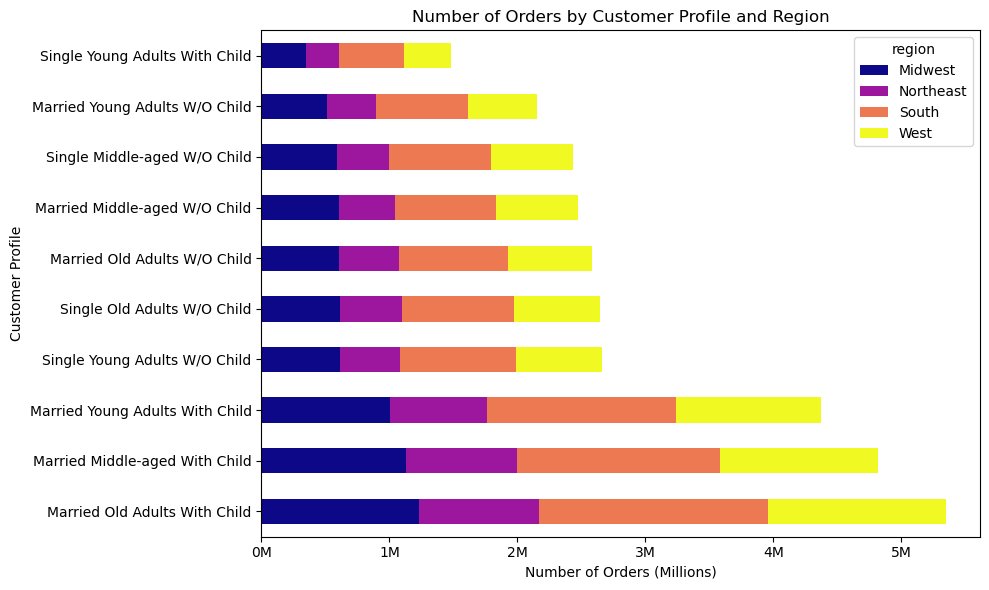

In [41]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 4))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['customer_prf', 'region']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Customer Profile')
ax.set_title('Number of Orders by Customer Profile and Region')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_cust_reg.png'))
plt.show()

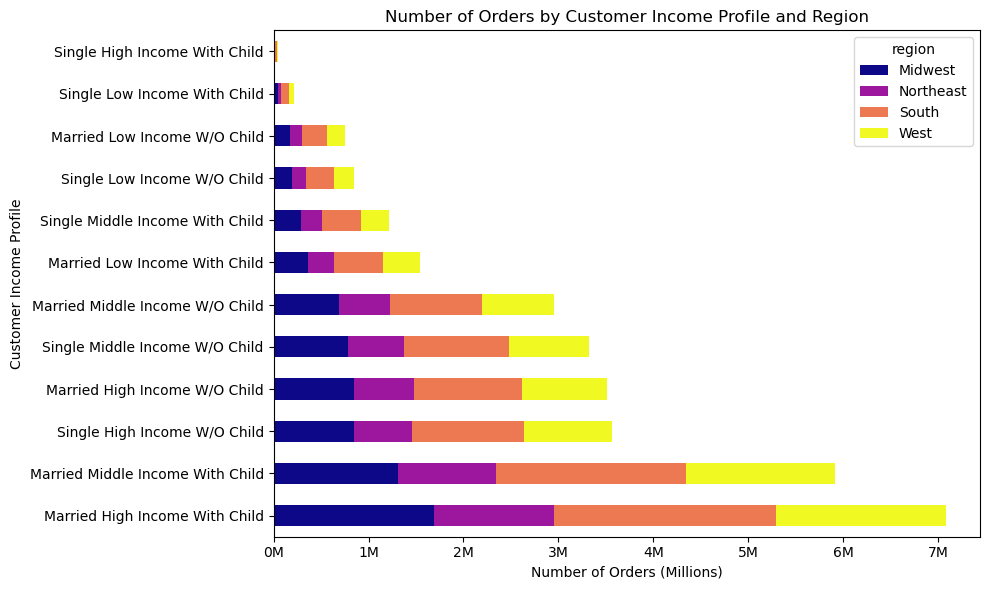

In [42]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 4))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['income_prf', 'region']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Customer Income Profile')
ax.set_title('Number of Orders by Customer Income Profile and Region')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_inc_reg_prf.png'))
plt.show()

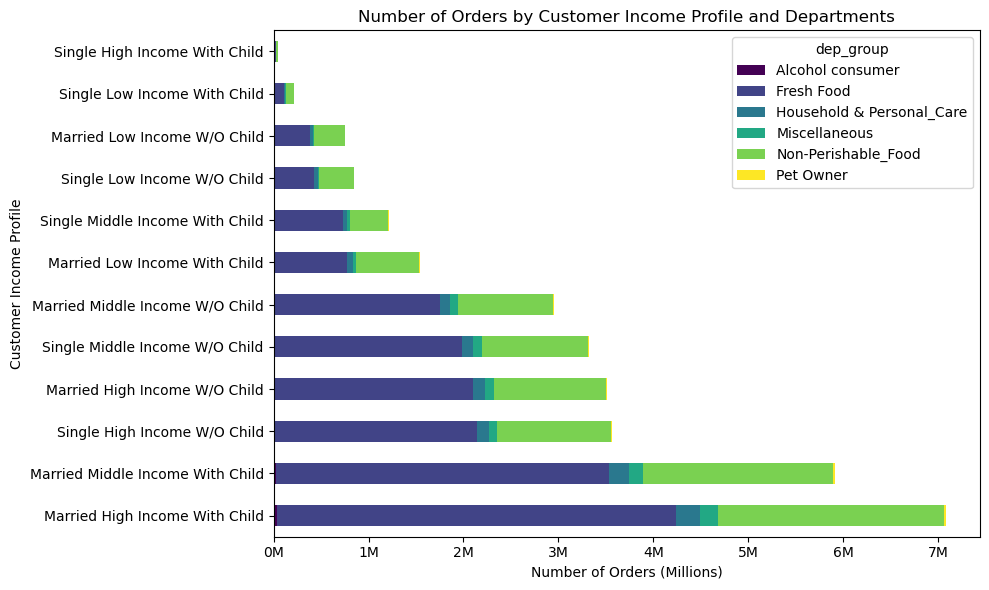

In [46]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.viridis(np.linspace(0, 1, 6))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['income_prf', 'dep_group']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Customer Income Profile')
ax.set_title('Number of Orders by Customer Income Profile and Departments')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_inc_dep_prf.png'))
plt.show()

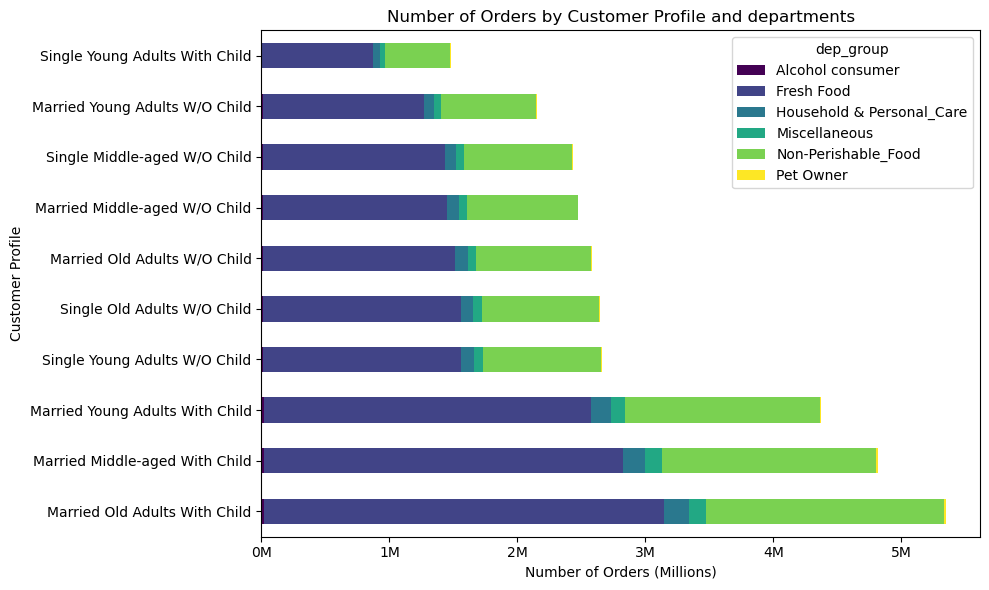

In [47]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.viridis(np.linspace(0, 1, 6))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['customer_prf', 'dep_group']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Customer Profile')
ax.set_title('Number of Orders by Customer Profile and departments')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_cust_dep_prf.png'))
plt.show()

### Export Final Data Frame

In [45]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final3.pkl'))